-----------------------------------------------------------
## Prueba técnica - Garruchos Agropecuaria - 15/10/2025
## Autora: Andrea Rodríguez



#Parte 2.1
-----------------------------------------------------------
### Objetivo:
### Evaluar la performance de las diferentes campañas de soja e identificar correlaciones entre el rendimiento y variables del suelo (conductividad eléctrica superficial y subsuperficial, y altimetría) relativos al lote.
-----------------------------------------------------------

### 1. Importación de librerías

In [1]:
pip install geopandas pandas shapely h3 pysal


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.1/157.1 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.1/248.1 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para análisis espacial
import h3
from pysal.explore import esda
from pysal.lib import weights

/usr/local/lib/python3.12/dist-packages/spaghetti/network.py:41: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)


### 2. Carga de datos

-----------------------------------------------------------------------------------------

**Datos de rendimiento de soja – campañas 2019, 2021 y 2023**

Descripción: Capa de puntos / H3 (resolución 12) con datos de rendimiento de soja del lote L4 de La Magdalena (Córdoba, Argentina).

Formato: GeoParquet (1.0.0)

Columnas:

campaign_year: Año final de la campaña (por ejemplo, 2019 para la campaña 2018/2019)

h3_res12: Índice H3 a resolución 12

geom: Columna geométrica (Punto, EPSG:4326)

performance_pct: Rendimiento relativo de soja en porcentaje (0–100), normalizado entre campañas

---------------------------------------------------------------

**Datos del sensor de suelo Veris**

NOTA: Los datos del sensor Veris corresponden solo a la campaña 2019, pero se pueden considerar como datos estáticos para el propósito de este desafío.

Descripción: Capa de puntos con datos del sensor de suelo del lote L4 de La Magdalena (Córdoba, Argentina).

Formato: GeoPackage

Columnas:

ec_surface: Conductividad eléctrica relativa a nivel superficial (%)

ec_subsurface: Conductividad eléctrica relativa a nivel sub-superficial (%)

altimetry_rel: Altimetría relativa

geom: Columna geométrica (Punto, EPSG:4326)

In [3]:
# Carga de los geodataframes
try:
    # 1. Rendimiento de soja (GeoParquet)
    soy = gpd.read_parquet("soy_performance_2019_2021_2023.parquet")

    # 2. Sensor Veris (GeoPackage)
    veris = gpd.read_file("veris_data.gpkg")

    # Inspección rápida
    print("Datos Rendimiento (Soja):", soy.shape, "| CRS:", soy.crs)
    print("Datos sensor Veris:", veris.shape, "| CRS:", veris.crs)

except FileNotFoundError:
    print("🚨 ERROR: No se pudieron cargar los archivos.")

Datos Rendimiento (Soja): (30684, 4) | CRS: {"$schema": "https://proj.org/schemas/v0.7/projjson.schema.json", "type": "GeographicCRS", "name": "WGS 84", "datum_ensemble": {"name": "World Geodetic System 1984 ensemble", "members": [{"name": "World Geodetic System 1984 (Transit)"}, {"name": "World Geodetic System 1984 (G730)"}, {"name": "World Geodetic System 1984 (G873)"}, {"name": "World Geodetic System 1984 (G1150)"}, {"name": "World Geodetic System 1984 (G1674)"}, {"name": "World Geodetic System 1984 (G1762)"}, {"name": "World Geodetic System 1984 (G2139)"}], "ellipsoid": {"name": "WGS 84", "semi_major_axis": 6378137, "inverse_flattening": 298.257223563}, "accuracy": "2.0", "id": {"authority": "EPSG", "code": 6326}}, "coordinate_system": {"subtype": "ellipsoidal", "axis": [{"name": "Geodetic latitude", "abbreviation": "Lat", "direction": "north", "unit": "degree"}, {"name": "Geodetic longitude", "abbreviation": "Lon", "direction": "east", "unit": "degree"}]}, "scope": "Horizontal com

### 3. Exploración de datos

Rendimiento de Soja

In [4]:
# Ver primeras filas de archivo
soy.head()

,geom,h3_res12,campaign_year,performance_pct
0,POINT (-63.80658 -33.99027),8cc34d60508b3ff,2023,45.174797
1,POINT (-63.8059 -33.99256),8cc34d6054613ff,2019,26.973471
2,POINT (-63.80346 -33.98607),8cc34d60574b1ff,2019,30.463606
3,POINT (-63.80778 -33.99145),8cc34d6050857ff,2019,20.181079
4,POINT (-63.79408 -33.98597),8cc34d601c2c9ff,2023,67.971290


In [5]:
# Mostrar cantidad de filas y features
ff = soy.shape
print(f'El dataset contiene {ff[0]} filas y {ff[1]} features.')

El dataset contiene 30684 filas y 4 features.


In [6]:
# Ver tipos de dato
soy.dtypes

,0
geom,geometry
h3_res12,object
campaign_year,int64
performance_pct,float64


In [7]:
# Contar valores nulos y mostrar porcentaje
missing_data = pd.DataFrame({'Valores nulos': soy.isnull().sum(), 'Porcentaje (%)': (soy.isnull().sum() / len(soy)) * 100})
missing_data.sort_values(by='Valores nulos', ascending=False)

,Valores nulos,Porcentaje (%)
geom,0,0.0
h3_res12,0,0.0
campaign_year,0,0.0
performance_pct,0,0.0


No hay valores nulos

In [8]:
# Chequeo de filas con valores cero o NaN
soy[soy.isna().any(axis=1)]

,geom,h3_res12,campaign_year,performance_pct


No hay filas con valores NaN

In [9]:
# Ver nombres de columnas
soy.columns

Index(['geom', 'h3_res12', 'campaign_year', 'performance_pct'], dtype='object')

In [10]:
# Renombrar columnas
soy = soy.rename(columns={'geom':'Geometria','h3_res12':'h3_soy', 'campaign_year':'Campaña_Año', 'performance_pct':'Rendimiento'})

# Chequeo
print(soy.columns)

Index(['Geometria', 'h3_soy', 'Campaña_Año', 'Rendimiento'], dtype='object')


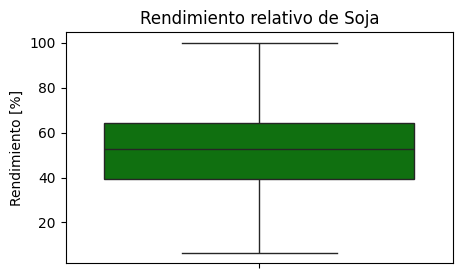


Descripción estadística para el rendimiento de soja:
count    30684.000000
mean        51.275217
std         17.002796
min          6.582787
25%         39.299079
50%         52.749383
75%         64.148723
max        100.000000
Name: Rendimiento, dtype: float64


In [11]:
# Chequeo de outliers en el rendimiento relativo de soja sin distinguir entre campañas
plt.figure(figsize=(5, 3))
sns.boxplot(y=soy['Rendimiento'], color="green")
plt.title('Rendimiento relativo de Soja')
plt.ylabel('Rendimiento [%]')
plt.show()

# Mostrar estadísticas
print("\nDescripción estadística para el rendimiento de soja:")
print(soy['Rendimiento'].describe())

Datos del sensor Veris

In [12]:
# Ver primeras filas
veris.head()

,ec_surface,ec_subsurface,altimetry_rel,geometry
0,35.517241,18.750000,99.469767,POINT (-63.78961 -33.98239)
1,37.586207,23.333333,99.489449,POINT (-63.78966 -33.98236)
2,38.965517,21.666667,99.444120,POINT (-63.7897 -33.98233)
3,33.103448,21.250000,99.432787,POINT (-63.78975 -33.98229)
4,35.862069,20.000000,99.420859,POINT (-63.7898 -33.98226)


In [13]:
#Mostrar cantidad de filas y features
ff1 = veris.shape
print(f'El dataset contiene {ff1[0]} filas y {ff1[1]} features.')

El dataset contiene 15383 filas y 4 features.


In [14]:
# Ver tipo de dato
veris.dtypes

,0
ec_surface,float64
ec_subsurface,float64
altimetry_rel,float64
geometry,geometry


In [15]:
# Contar valores nulos y mostrar porcentaje
missing_data = pd.DataFrame({'Valores nulos': veris.isnull().sum(), 'Porcentaje (%)': (veris.isnull().sum() / len(veris)) * 100})
missing_data.sort_values(by='Valores nulos', ascending=False)

,Valores nulos,Porcentaje (%)
ec_surface,0,0.0
ec_subsurface,0,0.0
altimetry_rel,0,0.0
geometry,0,0.0


No hay valores nulos

In [16]:
# Chequeo de filas con valores cero o NaN
veris[veris.isna().any(axis=1)]

,ec_surface,ec_subsurface,altimetry_rel,geometry


No hay filas con valores NaN

In [17]:
# Ver nombres de columnas
veris.columns

Index(['ec_surface', 'ec_subsurface', 'altimetry_rel', 'geometry'], dtype='object')

In [18]:
# Renombrar columnas
veris = veris.rename(columns={ 'ec_surface': 'ce_sup', 'ec_subsurface':'ce_subsup', 'altimetry_rel':'Altimetria', 'geometry':'Geometria'})

# Chequeo
print(veris.columns)

Index(['ce_sup', 'ce_subsup', 'Altimetria', 'Geometria'], dtype='object')


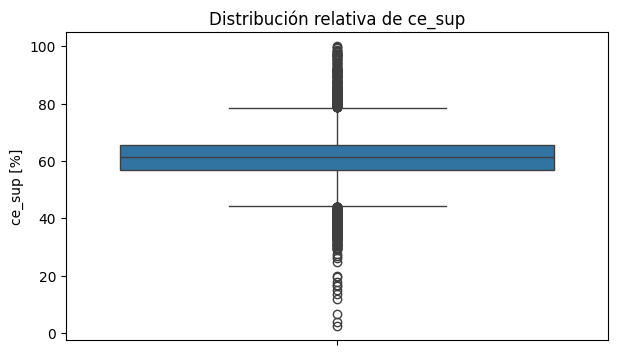


Estadistícas de ce_sup:
count    15383.000000
mean        60.802588
std          8.381917
min          2.413793
25%         56.896552
50%         61.379310
75%         65.517241
max        100.000000
Name: ce_sup, dtype: float64
------------------------------


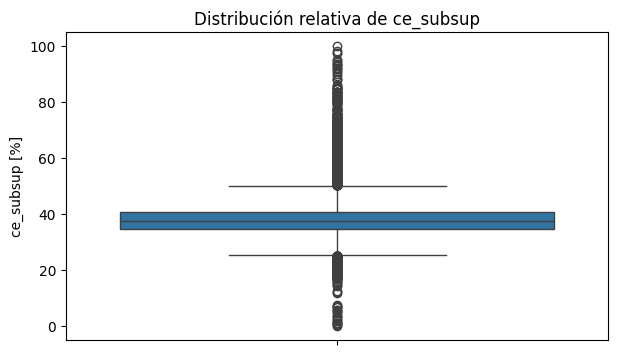


Estadistícas de ce_subsup:
count    15383.000000
mean        38.273906
std          8.474819
min          0.000000
25%         34.583333
50%         37.500000
75%         40.833333
max        100.000000
Name: ce_subsup, dtype: float64
------------------------------


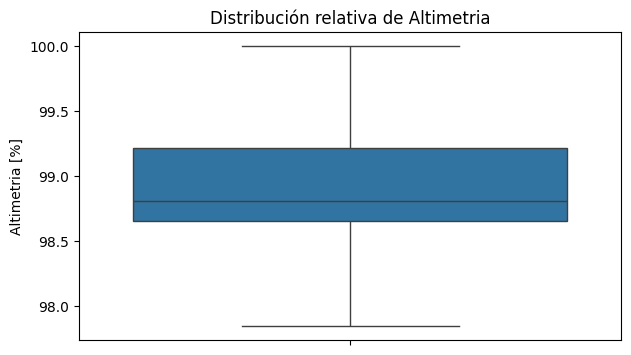


Estadistícas de Altimetria:
count    15383.000000
mean        98.909708
std          0.433664
min         97.846859
25%         98.655032
50%         98.811895
75%         99.215684
max        100.000000
Name: Altimetria, dtype: float64
------------------------------


In [19]:
# Chequeo de outliers en las propiedades del suelo
prop = ['ce_sup', 'ce_subsup', 'Altimetria']

for col in prop:
    plt.figure(figsize=(7, 4))
    sns.boxplot(y=veris[col])
    plt.title(f'Distribución relativa de {col}')
    plt.ylabel(f'{col} [%]')
    plt.show()

    print(f"\nEstadistícas de {col}:")
    print(veris[col].describe())
    print("-" * 30)

### 4. Evaluación de rendimiento por campañas

Se visualiza la tendencia general del rendimiento relativo para las 3 campañas.

/tmp/ipython-input-2804962081.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


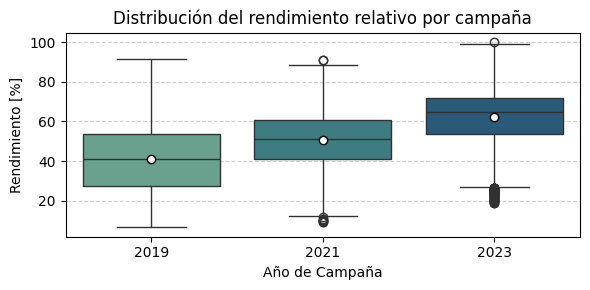

In [20]:
# Distribución del rendimiento por campaña
palette = sns.color_palette("crest", n_colors=soy['Campaña_Año'].nunique())

plt.figure(figsize=(6, 3))
sns.boxplot(
    data=soy,
    x='Campaña_Año',
    y='Rendimiento',
    palette= palette,
    showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})

plt.title('Distribución del rendimiento relativo por campaña')
plt.xlabel('Año de Campaña')
plt.ylabel('Rendimiento [%]')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

2019: alta variabilidad y algunos valores relativos bajos → posible heterogeneidad del lote o condiciones más extremas.

2021: distribución más compacta, rendimiento relativo más estable, aunque con algunos outliers bajos.

2023: rendimientos relativos altos y más concentrados → probablemente un año muy favorable.

Por lo tanto, se observa que el rendimiento relativo de la soja fue aumentando desde la camapaña 2019 a la 2023. Aunque se presentan una mayor cantidad de outliers, la media y mediana aumentan progresivamente para el año 2023.

### 5. Análisis espacial

Como los datos del sensor Veris son estáticos (una sola toma) y los datos de rendimiento son de tres campañas diferentes, se realiza una unión espacial por vecino más cercano (sjoin_nearest). Esto asigna a cada punto de rendimiento relativo, los datos de conductividad eléctrica (superficial y subsuperficial) y altimetría relativas del punto Veris geográficamente más cercano.

In [21]:
# Asignación de punto h3_res12 a la geometría del sensor veris
def geom_to_h3(Geometria, res=12):
    if Geometria.is_empty:
        return None
    lon, lat = Geometria.centroid.x, Geometria.centroid.y
    return h3.latlng_to_cell(lat, lon, res)

veris["h3_res12"] = veris.Geometria.apply(geom_to_h3)

# Chequeo de nueva columna con datos he_res12
display(veris.head())

,ce_sup,ce_subsup,Altimetria,Geometria,h3_res12
0,35.517241,18.750000,99.469767,POINT (-63.78961 -33.98239),8cc34d601186bff
1,37.586207,23.333333,99.489449,POINT (-63.78966 -33.98236),8cc34d601186bff
2,38.965517,21.666667,99.444120,POINT (-63.7897 -33.98233),8cc34d601186bff
3,33.103448,21.250000,99.432787,POINT (-63.78975 -33.98229),8cc34d6011847ff
4,35.862069,20.000000,99.420859,POINT (-63.7898 -33.98226),8cc34d6011847ff


In [22]:
veris['h3_res12'] = veris['h3_res12'].astype(str)
soy['h3_soy'] = soy['h3_soy'].astype(str)

In [23]:
# Setear geometria
soy.set_geometry('Geometria', inplace=True)
veris.set_geometry('Geometria', inplace=True)

# Cambio de CRS necesario para encontrar la distancia optima en sjoin_nearest
soy.to_crs(32720, inplace=True)
veris.to_crs(32720, inplace=True)

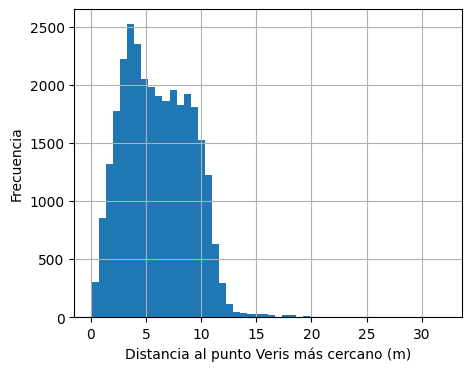

count    30684.000000
mean         6.053837
std          3.031914
min          0.095499
50%          5.837987
75%          8.424936
90%         10.070909
95%         10.787481
max         32.044628
Name: distancia_m, dtype: float64


In [24]:
# Unión de datasets por vecino más cercano
merged = gpd.sjoin_nearest(soy, veris, how="left", distance_col="distancia_m")

# Graficar histograma
plt.figure(figsize=(5, 4))
merged['distancia_m'].hist(bins=50)
plt.xlabel('Distancia al punto Veris más cercano (m)')
plt.ylabel('Frecuencia')
plt.show()

# Validación empírica de distancia óptima
# Mostrar estadísticas básicas
print(merged["distancia_m"].describe(percentiles=[0.5, 0.75, 0.9, 0.95]))

La distancia de los puntos sensados para el rendimiento y el punto Veris más cercano es 10 metros, ésta captura la mayoría de las asociaciones reales según los percentiles.

In [25]:
# Ver primeras filas de la unión espacial
merged.head()

,Geometria,h3_soy,Campaña_Año,Rendimiento,index_right,ce_sup,ce_subsup,Altimetria,h3_res12,distancia_m
0,POINT (425504.826 6238630.048),8cc34d60508b3ff,2023,45.174797,10917,56.896552,41.666667,98.827403,8cc34d60508b3ff,2.360019
1,POINT (425569.831 6238376.606),8cc34d6054613ff,2019,26.973471,14094,54.482759,32.500000,98.688433,8cc34d6054613ff,6.073222
2,POINT (425789.172 6239097.548),8cc34d60574b1ff,2019,30.463606,5254,66.206897,42.083333,99.076714,8cc34d60574b1ff,3.892213
3,POINT (425394.733 6238498.484),8cc34d6050857ff,2019,20.181079,12451,59.655172,40.833333,98.842314,8cc34d6050857ff,5.371057
4,POINT (426655.129 6239115.225),8cc34d601c2c9ff,2023,67.971290,4996,63.103448,36.666667,98.851260,8cc34d601c2c9ff,8.053075


In [26]:
# Chequear nulos
merged.isnull().sum()

,0
Geometria,0
h3_soy,0
Campaña_Año,0
Rendimiento,0
index_right,0
ce_sup,0
ce_subsup,0
Altimetria,0
h3_res12,0
distancia_m,0


In [27]:
# Ver nombres de columnas
merged.columns

Index(['Geometria', 'h3_soy', 'Campaña_Año', 'Rendimiento', 'index_right',
       'ce_sup', 'ce_subsup', 'Altimetria', 'h3_res12', 'distancia_m'],
      dtype='object')

In [28]:
# Ver tamaño
merged.shape

(30684, 10)

In [29]:
# Seleccionar solo las columnas relevantes para continuar el análisis
merged_subset = merged[['Campaña_Año', 'Rendimiento', 'ce_sup', 'ce_subsup', 'Altimetria', 'Geometria', 'h3_soy']]

# Chequear las primeras filas del nuevo DataFrame
display(merged_subset.head())

,Campaña_Año,Rendimiento,ce_sup,ce_subsup,Altimetria,Geometria,h3_soy
0,2023,45.174797,56.896552,41.666667,98.827403,POINT (425504.826 6238630.048),8cc34d60508b3ff
1,2019,26.973471,54.482759,32.500000,98.688433,POINT (425569.831 6238376.606),8cc34d6054613ff
2,2019,30.463606,66.206897,42.083333,99.076714,POINT (425789.172 6239097.548),8cc34d60574b1ff
3,2019,20.181079,59.655172,40.833333,98.842314,POINT (425394.733 6238498.484),8cc34d6050857ff
4,2023,67.971290,63.103448,36.666667,98.851260,POINT (426655.129 6239115.225),8cc34d601c2c9ff


### 6. Análisis de Correlación

El análisis se realizará segmentado por año final de la campaña (2019, 2021, 2023) para identificar si la influencia de las propiedades del suelo tienen relación con el rendimiento relativo anual. Se usan el coeficiente de r de Pearson para medir la relación lineal y el coeficiente de Spearman para medir relación monótona.

In [30]:
from scipy.stats import pearsonr, spearmanr

# Columnas para correlacionar
COL_RENDIMIENTO = 'Rendimiento'
COL_CAMPANIA = 'Campaña_Año'
COL_PREDICTORAS = ['ce_sup', 'ce_subsup', 'Altimetria']

# Lista para almacenar los resultados
resultados_lista = []

# Iterar sobre cada campaña
# Se usa 'camp' para el nombre de la campaña
for camp, df_grupo in merged_subset.groupby(COL_CAMPANIA):

    # Iterar sobre cada variable predictora para correlacionarla con el rendimiento
    for predictor in COL_PREDICTORAS:

        # Pearson (r)
        r_pearson, p_pearson = pearsonr(df_grupo[COL_RENDIMIENTO], df_grupo[predictor])

        # 2. Spearman (rho)
        r_spearman, p_spearman = spearmanr(df_grupo[COL_RENDIMIENTO], df_grupo[predictor])

        # Almacena los resultados en la lista
        resultados_lista.append({
            'Campaña': camp,
            'Variable': predictor,
            'Pearson_r': r_pearson,
            'Pearson_p': p_pearson,
            'Spearman_rho': r_spearman,
            'Spearman_p': p_spearman
        })

# Convertir la lista de resultados en un DataFrame
df_resultados = pd.DataFrame(resultados_lista)

print("Tabla de correlaciones por campaña y variable:")
print(df_resultados)

Tabla de correlaciones por campaña y variable:
   Campaña    Variable  Pearson_r      Pearson_p  Spearman_rho     Spearman_p
0     2019      ce_sup  -0.248806  2.628268e-144     -0.201098   6.446869e-94
1     2019   ce_subsup  -0.445081   0.000000e+00     -0.414654   0.000000e+00
2     2019  Altimetria  -0.028676   3.705257e-03     -0.049466   5.491704e-07
3     2021      ce_sup  -0.237581  1.740209e-131     -0.228259  2.985868e-121
4     2021   ce_subsup  -0.409871   0.000000e+00     -0.378770   0.000000e+00
5     2021  Altimetria   0.086712   1.443007e-18      0.087613   6.353634e-19
6     2023      ce_sup  -0.198715   2.714069e-91     -0.147785   7.148727e-51
7     2023   ce_subsup  -0.449050   0.000000e+00     -0.378337   0.000000e+00
8     2023  Altimetria  -0.011884   2.302179e-01     -0.061695   4.541165e-10


En pricipio, se observan correlaciones pequeñas y negativas para todas las campañas y variables.

A continuación se muestran en heatmaps las correlaciones calculadas, para un analisis visual y más directo.

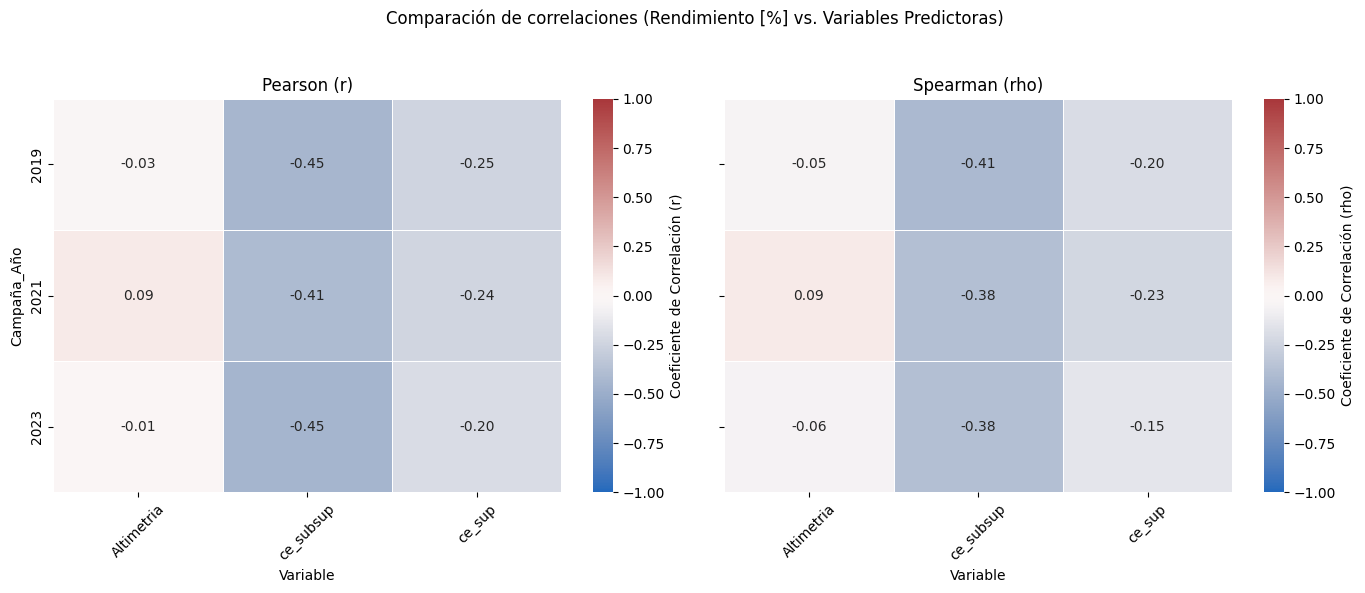

In [31]:
# Trasposición de la tabla usar en el heatmap
df_r_pearson = df_resultados.pivot(
    index='Campaña',          # Las filas serán las campañas
    columns='Variable',       # Las columnas serán las variables (ce_sup, ce_subsup, Altimetria)
    values='Pearson_r'        # Los valores de las celdas serán el coeficiente 'r'
)

df_r_spearman = df_resultados.pivot(
    index='Campaña',
    columns='Variable',
    values='Spearman_rho'
)

# Figura
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# HEATMAP de PEARSON
sns.heatmap(
    df_r_pearson,
    annot=True,              # Muestra el valor del coeficiente en la celda
    fmt=".2f",               # Formato con dos decimales
    cmap='vlag',             # Paleta de color divergente (rojo/azul para -1 a 1)
    vmin=-1, vmax=1,         # Rango fijo para una comparación justa
    linewidths=.5,
    cbar_kws={'label': 'Coeficiente de Correlación (r)'},
    ax=axes[0]
)
axes[0].set_title('Pearson (r)')
axes[0].set_ylabel('Campaña_Año')
axes[0].tick_params(axis='x', rotation=45)

# HEATMAP de SPEARMAN
sns.heatmap(
    df_r_spearman,
    annot=True,
    fmt=".2f",
    cmap='vlag',
    vmin=-1, vmax=1,
    linewidths=.5,
    cbar_kws={'label': 'Coeficiente de Correlación (rho)'},
    ax=axes[1]
)
axes[1].set_title('Spearman (rho)')
axes[1].set_ylabel('') # La etiqueta de la campaña es compartida
axes[1].tick_params(axis='x', rotation=45)

plt.suptitle('Comparación de correlaciones (Rendimiento [%] vs. Variables Predictoras)')
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Ajusta el espacio para el título superior
plt.show()

Del gráfico se desprende que la variable ce_subsup es consistentemente la que tiene la relación más fuerte (aunque negativa) con el rendimiento, lo que sugiere que las propiedades del subsuelo medidas en subsuperficie son más influyentes que las de la superficie.

El bajo valor de Pearson (r≤0.45) para todas las variables en todas las campañas significa que el modelo de regresión lineal simple es inadecuado para predecir el rendimiento.

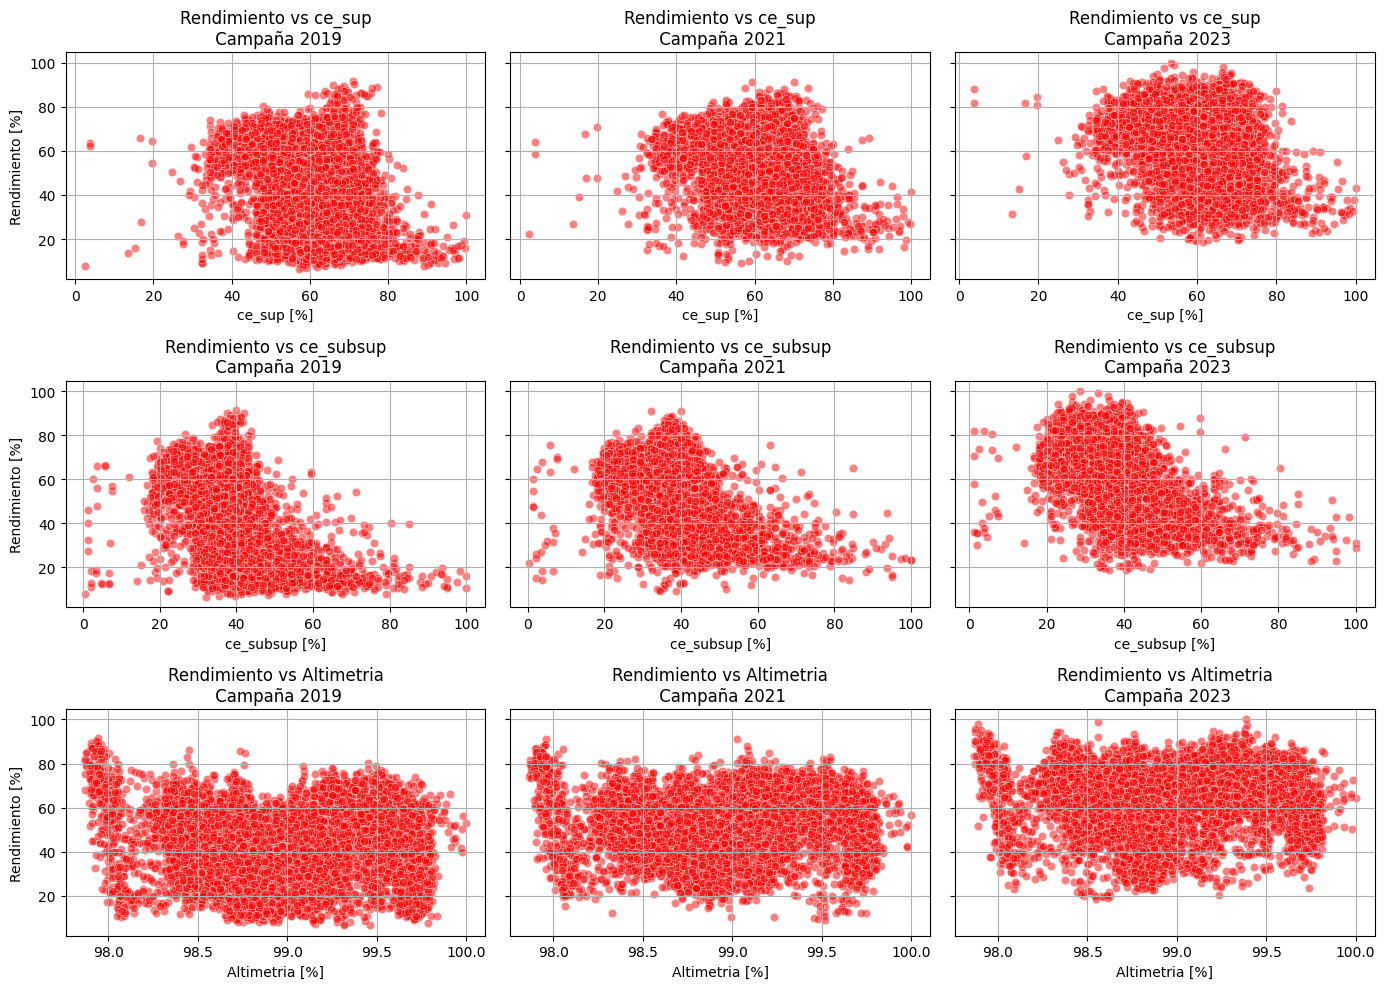

In [32]:
# Grafico para visualizar relacion entre rendimiento y propiedades del suelo
propiedades_suelo = ['ce_sup', 'ce_subsup', 'Altimetria']
año_campaña = sorted(merged_subset['Campaña_Año'].unique())

fig, axes = plt.subplots(nrows=len(propiedades_suelo), ncols=len(año_campaña), figsize=(14, 10), sharey=True)

for i, prop in enumerate(propiedades_suelo):
    for j, year in enumerate(año_campaña):
        df_year = merged_subset[merged_subset['Campaña_Año'] == year]
        sns.scatterplot(data=df_year, x=prop, y='Rendimiento', alpha=0.5, ax=axes[i, j], c='red')
        axes[i, j].set_title(f'Rendimiento vs {prop}\n Campaña {year}')
        axes[i, j].set_xlabel(f'{prop} [%]')
        axes[i, j].set_ylabel('Rendimiento [%]')
        axes[i, j].grid(True)

plt.tight_layout()
plt.show()

Los gráficos exponen que no existe una relacion lineal fuerte entre las propiedades del suelo y rendimiento relativos para las campañas analizadas.

La distribución de los puntos es dispersa y amorfa, lo cual es consistente con los bajos valores del coeficiente de correlación de Pearson obtenidos previamente.

Lo que también se observa es que para los casos donde la conductividad eléctrica (tanto superficial como subsuperfial) tienen los valores relativos más altos, el rendimiento relativo se mantiene en sus rangos más bajos.

### Aprendizaje no supervisado

Se propone aplicar K-means. En este momento del analisis, y considerando el comportamiento similar de las relaciones entre las diferentes campañas, se optó por caracterizar el comportamiento del rendimiento vs las propiedades del suelo, sin distinguir entre campañas.

Este enfoque busca conocer y analizar diferentes patrones espaciales de variabilidad que sean persistentes en el tiempo. Esto permitiría definir zonas  más estables (relativas) y detectar limitaciones inherentes del suelo.  

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull

# Seleccionar solo las variables estáticas que definen la zona
variables_clustering = ['Rendimiento','ce_subsup', 'ce_sup', 'Altimetria']
X = merged_subset[variables_clustering].copy()

# Inicializar y aplicar el escalador
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Variables listas para clustering: {variables_clustering}")
print(f"Dimensiones de los datos escalados: {X_scaled.shape}")
print(f"Datos escalados (muestra): {X_scaled[:2]}")

Variables listas para clustering: ['Rendimiento', 'ce_subsup', 'ce_sup', 'Altimetria']
Dimensiones de los datos escalados: (30684, 4)
Datos escalados (muestra): [[-0.35879506  0.41033125 -0.46042901 -0.20624911]
 [-1.42930271 -0.66576367 -0.74795519 -0.52933398]]


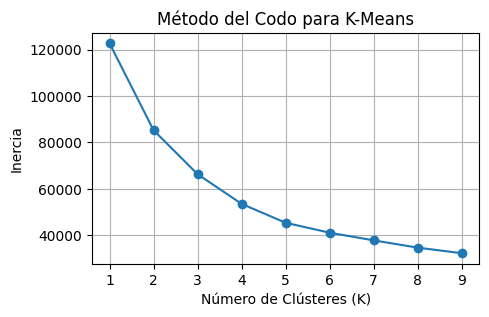

In [34]:
# Determinamos el número óptimo de clústeres (K) con el método del codo y aplicamos K-Means.
inercia = []
K_rango = range(1, 10)
for k in K_rango:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inercia.append(kmeans.inertia_)

plt.figure(figsize=(5, 3))
plt.plot(K_rango, inercia, marker='o')
plt.title('Método del Codo para K-Means')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

Se considera que el K-óptimo es 4

In [35]:
K_OPT = 4
kmeans = KMeans(n_clusters=K_OPT, random_state=42, n_init=10)
merged_subset.loc[:,'cluster_zona'] = kmeans.fit_predict(X_scaled)

print(f"Zonificación completada. {K_OPT} clústeres creados.")

# Analizar el comportamiento de las variables dentro de cada zona (clúster)
analisis_zonas = merged_subset.groupby('cluster_zona')[X.columns].mean()
print("\nAnálisis de las Zonas de Manejo (Valores Medios)")
print(analisis_zonas.round(2))
# Exportar csv
analisis_zonas.to_csv('analisis_zonas.csv')

Zonificación completada. 4 clústeres creados.

Análisis de las Zonas de Manejo (Valores Medios)
              Rendimiento  ce_subsup  ce_sup  Altimetria
cluster_zona                                            
0                   62.18      38.16   63.26       98.65
1                   60.48      29.55   50.43       99.47
2                   35.75      39.44   61.69       98.93
3                   31.22      61.01   74.43       98.70


/usr/local/lib/python3.12/dist-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Se obtuvieron 4 clusters.

Los clusters 0 y 1 presentan buen rendimiento relativo y una CE superficial relativa baja. Se distinguen por registrar también los valores más bajos de CE subsuperficial. Estos representan los ambientes de mayor potencial productivo del lote.

Los clusters 2 y 3 se caracterizan por un rendimiento relativo significativamente más bajo. Las CE relativas son elevadas. Específicamente, el Cluster 3 presenta la CE subsuperficial relativa máxima del lote y el rendimiento relativo mínimo, estableciendo la zona de mayor limitación edáfica.

-------------------------------------------------

La altimetría relativa en este lote muestra baja variabilidad, por lo que no parece ser un factor significativo en la segmentación de los clusters. Sin embargo, en un análisis más detallado, la altimetría podría ser un factor crucial al influir en el drenaje y la disponibilidad de agua, lo que justificaría un estudio exhaustivo de sus interacciones con otras variables del suelo.

In [36]:
from scipy.spatial import Voronoi
from shapely.geometry import Polygon

# Asegurar el CRS proyectado para cálculos geométricos precisos
CRS_PROYECTADO = 'EPSG:32720'
if merged.crs.is_geographic:
    merged = merged.to_crs(CRS_PROYECTADO)

# Crear los polígonos de Thiessen (Voronoi)
# Extraer las coordenadas (X, Y)
puntos_coord = np.array([(geom.x, geom.y) for geom in merged.geometry])

# Calcular la estructura de Voronoi
vor = Voronoi(puntos_coord)

# Crear los polígonos de Voronoi (un polígono por cada punto)
poligonos = []
for region in vor.regions:
    if not -1 in region: # Asegurar que la región es cerrada
        # Coordenadas de los vértices del polígono
        vertices = vor.vertices[region]
        poligonos.append(Polygon(vertices))

# Se utiliza un buffer (área de influencia) pequeño en los puntos y se disuelve
# para aproximar el resultado de las zonas contiguas de Voronoi.
buffer_distancia = 0.5 # 0.5 metros, solo para asegurar que los polígonos se toquen.

# Crear un buffer alrededor de cada punto
df_buffer = merged_subset.copy()
df_buffer['geometry'] = df_buffer.geometry.buffer(buffer_distancia)

# Disolver polígonos por zona de manejo
df_zonas_final = df_buffer.dissolve(by='cluster_zona', aggfunc='first')

# Suavizar los bordes irregulares creados por el clustering y la disolución.
df_zonas_final['geometry'] = df_zonas_final.geometry.simplify(tolerance=3) # Tolerancia de 3 metros

# Exportar el mapa vectorial final
RUTA_MAPA_FINAL = "clusters_rendimiento.gpkg"
df_zonas_final[['geometry']].to_file(RUTA_MAPA_FINAL, driver="GPKG")

print(f"Archivo exportado: {RUTA_MAPA_FINAL} (Contiene polígonos de manejo).")

Archivo exportado: clusters_rendimiento.gpkg (Contiene polígonos de manejo).


Conclusiones:

Existe una relación inversa (no lineal) del rendimiento relativo de la soja con la conductividad eléctrica. Las zonas con las CE relativas más bajas (Clúster 1) tienen el rendimiento relativo más alto, y las zonas con las CE relativas más altas (Clúster 3) tienen el rendimiento relativo más bajo.

La Altimetría más alta (Clúster 1) se correlaciona con el mejor rendimiento relativo.

----------------------------------------------------------------------------------

Mi siguiente paso lógico sería realizar un análisis de variación temporal mediante la aplicación de K-means a los datos de rendimiento relativo de cada campaña por separado. Esto no buscaría definir las zonas de manejo permanentes, sino que nos permitiría cuantificar inestabilidad e identificar zonas resilientes.

# Parte 2.2
-----------------------------------------------------
### Objetivo:
### Identificar puntos críticos ("hotspots") y puntos fríos ("coldspots") espaciales en el rendimiento de la campaña 2020-2021

Se propone la aplicación de el estadístico Getis-Ord Gi*

In [37]:
# Importar librerias
from esda.getisord import G_Local
from pysal.lib import weights
from libpysal.weights import fill_diagonal

In [38]:
# Filtrar datos de la campaña 2020-2021
CAMPAÑA_ANALISIS = 2021
df_2021 = merged_subset[merged_subset['Campaña_Año'] == CAMPAÑA_ANALISIS].copy()

# Calcular los centroides
df_2021['centroide'] = df_2021['Geometria'].centroid

# Extraer las coordenadas (lat, lon) del centroide
df_2021['lon'] = df_2021['centroide'].x
df_2021['lat'] = df_2021['centroide'].y

print(f"Datos filtrados para la campaña {CAMPAÑA_ANALISIS}: {len(df_2021)} registros.")

Datos filtrados para la campaña 2021: 10249 registros.


In [39]:
# Variables a usar para el cálculo de la distancia
coordenadas = df_2021[['lon', 'lat']].values

# Usar k-Nearest Neighbors (KNN)
# K=6 para simular los 6 vecinos de una celda H3.
w_knn = weights.KNN.from_array(coordenadas, k=8)
# Gi* necesita el peso propio. Asignamos 1.0 a la diagonal para el peso de la celda consigo misma.
w = fill_diagonal(w_knn, 1.0)
w.transform = 'R' # Normalizar por filas

print(f"Matriz de pesos creada. Cada celda tiene un promedio de {w.mean_neighbors:.2f} vecinos.")

Matriz de pesos creada. Cada celda tiene un promedio de 9.00 vecinos.


El valor 9 es el resultado del promedio de vecinos de la matriz final w, que incluye la celda central más los 8 vecinos más cercanos.

In [40]:
# Extraer la variable de interés: Rendimiento
rendimiento = df_2021['Rendimiento'].values

# Calcular Getis-Ord Gi*
# Usa el estadístico G_Local de esda.
gi_star = G_Local(rendimiento, w, star=True)

# Asignar el valor Z (estadístico Gi*) al DataFrame
df_2021.loc[:, 'gi_star'] = gi_star.Gs

# Asignar el valor P (probabilidad) al DataFrame
df_2021.loc[:, 'gi_p_value'] = gi_star.p_sim

In [41]:
# Clasificar los resultados (Hotspots y Coldspots)

# Definir el nivel de significancia (95% de confianza, p < 0.05)
NIVEL_SIGNIFICANCIA = 0.05

# Categorizar los clústeres significativos
# Criterios: p < 0.05 Y Gi_star es positivo (Alto) o negativo (Bajo)
def clasificar_hotspot(row):
    if row['gi_p_value'] < NIVEL_SIGNIFICANCIA:
        if row['gi_star'] > 0:
            return 'Hotspot (Alto-Alto)' # Cluster de Rendimiento Alto
        elif row['gi_star'] < 0:
            return 'Coldspot (Bajo-Bajo)' # Cluster de Rendimiento Bajo
    return 'No Significativo'

df_2021.loc[:, 'cluster_gi'] = df_2021.apply(clasificar_hotspot, axis=1)

print("\nConteo de Hotspots y Coldspots significativos")
print(df_2021['cluster_gi'].value_counts())

df_2021['cluster_gi'].value_counts().to_csv('Hotspots_coldspots.csv')


Conteo de Hotspots y Coldspots significativos
cluster_gi
Hotspot (Alto-Alto)    5459
No Significativo       4790
Name: count, dtype: int64


El hallazgo más importante es la fuerte presencia de Hotspots y la ausencia de Coldspots.

Si bien hay zonas de muy bajo rendimiento (Clúster 3 en análisis K-Means), estas áreas de bajo rendimiento no están rodeadas por otras áreas de bajo rendimiento al menos para la campaña 2020-2021. Los problemas que causan bajo rendimiento en esta campaña (como pueden ser fallas puntuales de siembra o anegamiento muy local) son dispersos o aparecen como outliers.


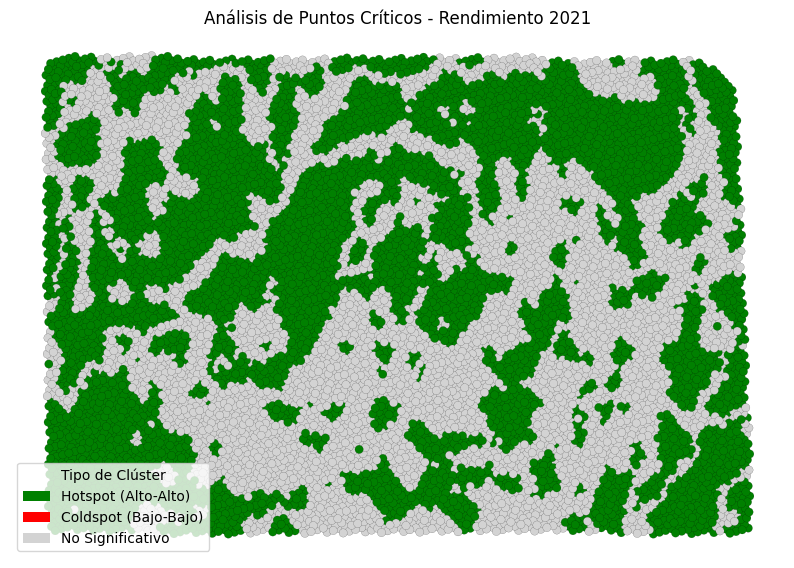

Mapeo de Hotspots/Coldspots completado para la campaña 2021. Los clústeres significativos están en verde (Hotspots) y rojo (Coldspots).


In [42]:
gdf_final = df_2021[['h3_soy', 'Rendimiento', 'cluster_gi', 'Geometria']].copy()

# Convertir a GeoDataFrame, usando 'Geometria' como la columna de geometría
gdf_final = gpd.GeoDataFrame(
    df_2021.copy(),
    geometry='Geometria',
    crs="EPSG:32720"
)

# Generar el Mapa de Hotspots y Coldspots
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Definir un esquema de colores para los clusters Gi*
color_map = {
    'Hotspot (Alto-Alto)': 'green',  # Rendimiento Alto rodeado de Alto
    'Coldspot (Bajo-Bajo)': 'red',    # Rendimiento Bajo rodeado de Bajo
    'No Significativo': 'lightgrey' # Clústeres no estadísticamente significativos
}

# Aplicar el color de mapeo
gdf_final['color'] = gdf_final['cluster_gi'].map(color_map)

# Trazar el GeoDataFrame
gdf_final.plot(
    ax=ax,
    color=gdf_final['color'],
    edgecolor='black',
    linewidth=0.1
)

# Configuración del Título y Leyenda
ax.set_title(f'Análisis de Puntos Críticos - Rendimiento {CAMPAÑA_ANALISIS}')
ax.set_axis_off()

# Crear handles de leyenda manuales
legend_handles = [plt.Rectangle((0, 0), 1, 1, fc=color_map[key]) for key in color_map]
plt.legend(legend_handles, color_map.keys(), loc='lower left', title='Tipo de Clúster')
plt.gca().set_aspect('equal')
plt.show()

print(f"Mapeo de Hotspots/Coldspots completado para la campaña {CAMPAÑA_ANALISIS}. Los clústeres significativos están en verde (Hotspots) y rojo (Coldspots).")

In [43]:
# Exportación para QGIS

columnas_requerida= [
    'Geometria',        # Columna de geometría de polígono
    'gi_star',          # Estadístico Gi*
    'gi_p_value',       # Valor P
    'cluster_gi',       # Clasificación (Hotspot/Coldspot)
    'color',            # Color para visualización
    'Campaña_Año',      # Año de la campaña
    'Rendimiento'       # Valor de rendimiento
]

gdf_export = gdf_final[columnas_requerida].copy()

gdf_export = gpd.GeoDataFrame(
    gdf_export,
    geometry='Geometria',
    crs=gdf_final.crs
)

hotspots2021 = 'Analisis_Hotspot_Rendimiento_2021.gpkg'

# 2. Exportar el GeoDataFrame
# Usamos el GeoDataFrame que contiene la geometría de polígono (Geometria)
# y los resultados del Gi* (cluster_gi).

try:
    # Exportar a GeoPackage
    gdf_export.to_file(hotspots2021, driver="GPKG")
    print(f"\n✅ Exportación exitosa. Archivo guardado como: {hotspots2021}")

except Exception as e:
    # En caso de error (ej. Shapefile tiene restricciones de nombres)
    print(f"\n⚠️ Error al exportar a GeoPackage: {e}")
    print("Intentando exportar a Shapefile...")

    # Intento de respaldo con Shapefile (puede truncar nombres de columnas)
    hotspots2021_SHP = 'Analisis_Hotspot_Rendimiento_2021.shp'
    gdf_final.to_file(hotspots2021_SHP, driver="ESRI Shapefile")
    print(f"✅ Exportación de respaldo exitosa como: {hotspots2021_SHP}")


✅ Exportación exitosa. Archivo guardado como: Analisis_Hotspot_Rendimiento_2021.gpkg


#Conclusiones

El análisis de las tres campañas de soja del Lote L4 “La Magdalena” permitió integrar datos de rendimiento, conductividad eléctrica y altimetría relativos, identificando patrones espaciales consistentes a lo largo del tiempo.

- Las zonas de **mayor rendimiento relativo** se asocian con **baja conductividad eléctrica** y **mayor altimetría**, indicando zonas relativas de suelos más livianos y mejor drenados.

- Las áreas de **bajo rendimiento** presentan **mayor conductividad eléctrica**, posiblemente vinculadas a acumulación de sales o excesos hídricos relativos dentro del lote.

- Los coeficientes de correlación (Pearson y Spearman) fueron **bajos**, lo que indica que **no existe una relación lineal fuerte** entre las variables de suelo y el rendimiento relativo. Esto sugiere que el comportamiento productivo responde a **interacciones más complejas o no lineales**, posiblemente vinculadas a factores de manejo o condiciones climáticas específicas por campaña.

- Aun así, el análisis exploratorio y los mapas espaciales muestran **ciertas tendencias locales**, donde zonas con **mayor conductividad eléctrica** tienden a tener **rendimientos relativos menores**, aunque sin una correlación estadísticamente significativa a nivel global.

- El **agrupamiento no supervisado (K-Means)** permitió identificar zonas con comportamiento productivo similar entre campañas, aportando una primera segmentación del lote útil para estrategias de manejo sitio-específico.

- El **análisis de hotspots (Getis-Ord Gi\*)** confirmó la existencia de áreas con alta autocorrelación espacial positiva (zonas calientes de alto rendimiento relativo), que coinciden en gran medida con los clusters de mayor productividad, validando el patrón espacial de estabilidad productiva.

En conjunto, los resultados muestran que **la variabilidad del rendimiento no se explica únicamente por las propiedades edáficas medidas**, y que sería necesario integrar variables adicionales (como humedad, textura, y NDVI temporal) para mejorar la comprensión de los factores limitantes.

---

## Referencias

- Garruchos Agropecuaria – Desafío Práctico de Desarrollador/a de Datos Geoespaciales (2025)  
- GeoPandas, PySAL, Scikit-learn y PostgreSQL/PostGIS Documentation